# Анализ игровой индустрии для прогнозирования успешности продуктов в магазине Стримчик

**Цель исследования:** Определить ключевые факторы, влияющие на популярность компьютерных игр, выявить тренды в продажах по платформам и жанрам, а также проверить гипотезы, которые помогут оптимизировать планирование рекламных кампаний и увеличить доходы магазина в 2017 году по данным о компьютерных играх до 2016 года (данные за 2016 неполные)

## Загрузка данных

### Импорт библиотек

In [1]:
import pandas as pd # для работы с датафреймами
import matplotlib.pyplot as plt # для работы с графиками
import seaborn as sns # для работы с графиками
import scipy.stats as st # для работы со статистическими методами

### Сохранение данных в датафреймы

In [2]:
# сохраняем информацию об играх в датасет data
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

### Изучение общей информации о данных

In [3]:
data.head(20) # выводим первые 20 строк таблицы

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info() # выводим общую информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Сразу заметно, что в названиях столбцов есть заглавные буквы, в некоторых строках есть пропуски, возможны неявные дубликаты в столбцах Name, Platform, Genre и Rating

**Промежуточный вывод:** Были импортированы необходимые библиотеки и получено общее представление об изучаемых данных

## Предобработка данных

### Обработка названий столбцов

In [5]:
data.columns = [i.lower() for i in list(data.columns)] # приводим столбцы к snake case

In [6]:
data.head(1) # проверяем

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


### Обработка типов данных

Изменим тип данных столбца year_of_release на datetime и user_score на float

In [7]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y').dt.year # изменяем тип данных на datetime

In [8]:
data['user_score'].unique() # выводим уникальные значения чтобы убедиться что все значения численные

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Можно заметить значение *tbd*, что означает 'будет определено', в нашем случае это значение равносильно пропуску

In [9]:
data['user_score'] = data['user_score'].replace('tbd', None).astype('float') # заменяем tbd на None и меняем тип данных на float

In [10]:
data.info() # проверяем

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


### Обработка пропусков

In [11]:
# выводим пропуски для каждого из столбцов
for i in data.columns:
    if data[i].isna().sum() != 0:
        print(f'{i}: {data[i].isna().sum()}')

name: 2
year_of_release: 269
genre: 2
critic_score: 8578
user_score: 9125
rating: 6766


Удалим строки с пропусками в *name* и *year_of_release*, так как эти данные очень важны в рамках исследования и востановить или заменить их нельзя

Предворительно посмотрим на строки которые будем удалять

In [12]:
# выводим строки с пропусками в name
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
# выводим 5 строк с наибольшими продажами в NA и пропусками в year_of_release
data[data['year_of_release'].isna()].sort_values(by='na_sales', ascending=False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+


Продаж не слишком много, можно удалять

In [14]:
data = data[data['name'].isna() == False].reset_index(drop=True) # удаляем строки с пропусками в name
data = data[data['year_of_release'].isna() == False].reset_index(drop=True) # удаляем строки с пропусками в year_of_release

Пропуски в rating можно заменить на RP (ожидается рейтинг)

In [15]:
data['rating'] = data['rating'].fillna('RP') # заполняем пропуски

In [16]:
# выводим пропуски для каждого из столбцов для проверки
for i in data.columns:
    if data[i].isna().sum() != 0:
        print(f'{i}: {data[i].isna().sum()}')

critic_score: 8461
user_score: 8981


Остальные пропуски пока оставим, поскольку заменив их на средние или медианные значения, мы исказим данные

Посмотрим на количество игр разных категорий

In [17]:
data['rating'].value_counts()

rating
RP      6677
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
Name: count, dtype: int64

Рейтинги EC K-A и AO имеют малое количество значений, заменим их на равнозначные/похожие рейтинги:
 - EC (Early Childhood) на E (Everyone)
 - K-A (Kids to Adults) на E (Everyone)
 - AO (Adults Only) на M (Mature)

In [18]:
# заменяем
data.loc[(data['rating'] == 'EC') | (data['rating'] == 'K-A'), 'rating'] = 'E'
data.loc[data['rating'] == 'AO', 'rating'] = 'M'

Возможные причины пропусков:
 - *name* - название игры не было указано изначально в источнике данных или у игр не было названия
 - *year_of_release* - год выпуска не был указан или некорректно записан
 - *genre* - жанр не был указан в исходном источнике данных или игра не относится к конкретному жанру
 - *critic_score* - игра не получила оценок критиков
 - *user_score* - пользователи не оценивали игру или еще не успели(о чем говорит значение tbd)
 - *rating* - игра не проходила сертификацию ESRB или рейтинг не был зафиксирован

### Обработка дубликатов

In [19]:
data.duplicated().sum() # проверям наличие полных дубликатов строк

np.int64(0)

Полных дубликатов нет

In [20]:
data['name'].value_counts()

name
Need for Speed: Most Wanted               12
LEGO Marvel Super Heroes                   9
Ratatouille                                9
FIFA 14                                    9
Terraria                                   8
                                          ..
Loving Life with Hello Kitty & Friends     1
Scrabble (Others sales)                    1
Viva Pinata: Party Animals                 1
Sands of Destruction                       1
Haitaka no Psychedelica                    1
Name: count, Length: 11426, dtype: int64

In [21]:
data[data['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
252,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
519,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,RP
1177,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1574,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1976,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2025,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,RP
3531,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5883,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6177,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,RP
6310,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


На примере игры *Need for Speed: Most Wanted* видно что повторы возникают когда игра выпускается на несколько платформ или в разные года

In [22]:
# ищем дубликаты по ключевым столбцам
data[['name', 'platform', 'year_of_release']].duplicated().sum()

np.int64(1)

In [23]:
# выводим эту строку
data[data[['name', 'platform', 'year_of_release']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15969,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


Продаж почти нет, можно просто удалить строку

In [24]:
data = data[data[['name', 'platform', 'year_of_release']].duplicated() == False].reset_index(drop=True)

In [25]:
# проверяем столбцы на неявные дубликаты
for i in ['platform', 'genre']:
    print(data[i].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


Здесь дубликатов нет

### Добавление нового столбца

In [26]:
# добавляем столбец с суммой продаж во всех регионах
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(1) # проверяем

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54


**Промежуточный вывод:** В результате предобработки данных были обработаны пропуски, дубликаты, названия столбцов и типы данных в таблицах, а также добавлен столбец с общей выручкой. Все это упростит дальнейшую работу с данными

In [27]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы

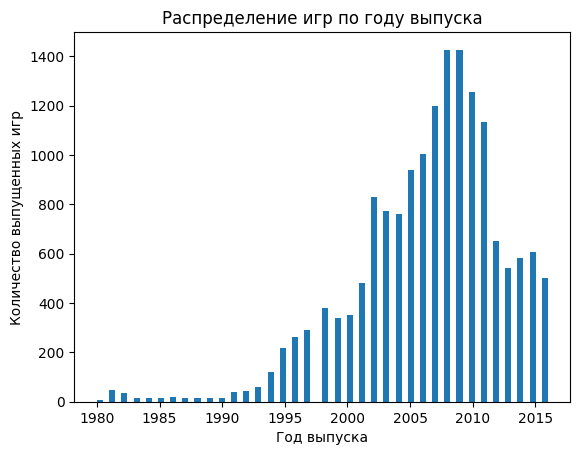

In [28]:
# строим гистограмму по столбцу year_of_release чтобы оценить сколько игр выпускалось в разные годы
data['year_of_release'].hist(bins=2 * len(data['year_of_release'].unique()), grid=False)
plt.title('Распределение игр по году выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр');

С 1995 по 2008 год наблюдается значительный рост выпуска игр, пик выпуска игр - 2008–2011 годы, затем снижение, что может быть связано, например, с насыщением рынка. Для анализа актуальных трендов будем использовать данные начиная с 2000 года, так как более ранние периоды менее репрезентативны из-за неразвитости индустрии

### Как менялись продажи по платформам

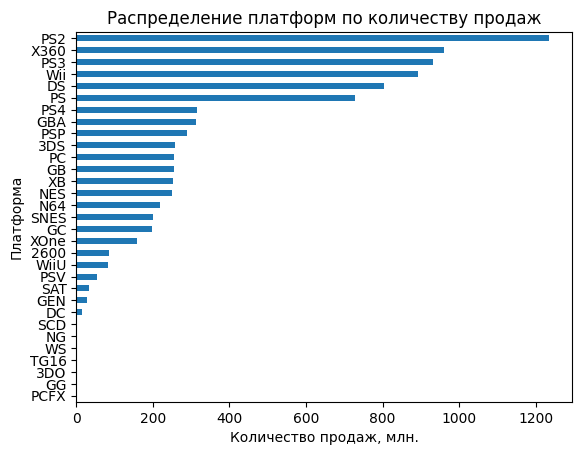

In [29]:
# строим график распределения платформ по количеству продаж
(data.pivot_table( # делаем сводную таблицу с общим количеством продаж по платформам
    index='platform', 
    values='total_sales', 
    aggfunc='sum')
        .sort_values(by='total_sales') # соритруем
            .plot(kind='barh', legend=False) # строим горизонтальную гистограмму
)
plt.title('Распределение платформ по количеству продаж')
plt.xlabel('Количество продаж, млн.')
plt.ylabel('Платформа');

Возьмем первые 5 платформ и изучим как менялись продажи по годам

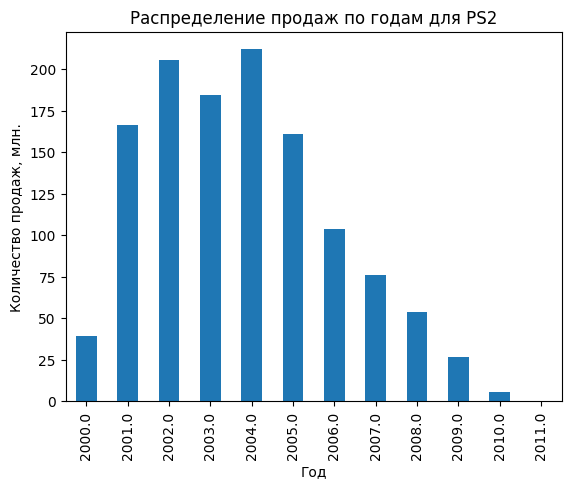

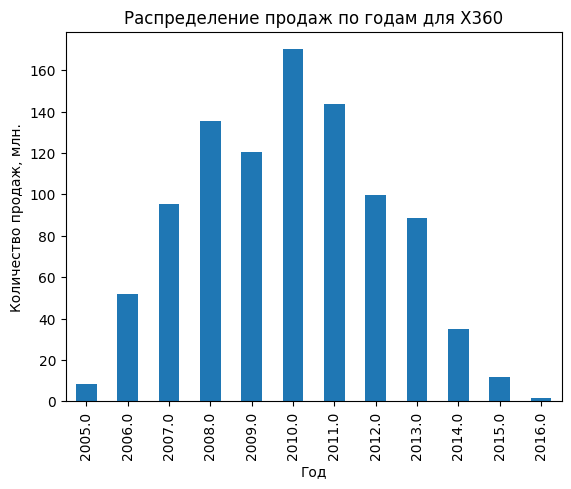

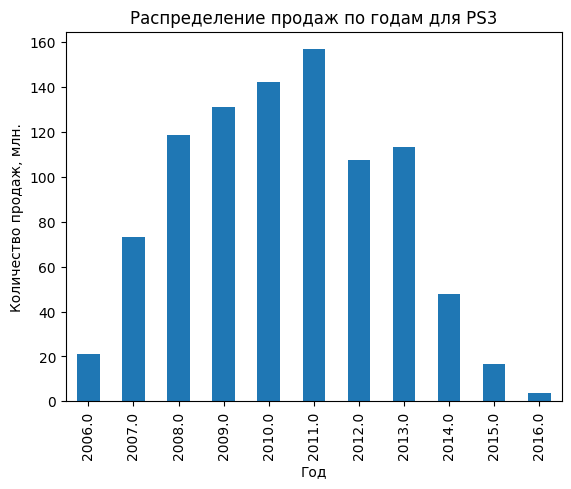

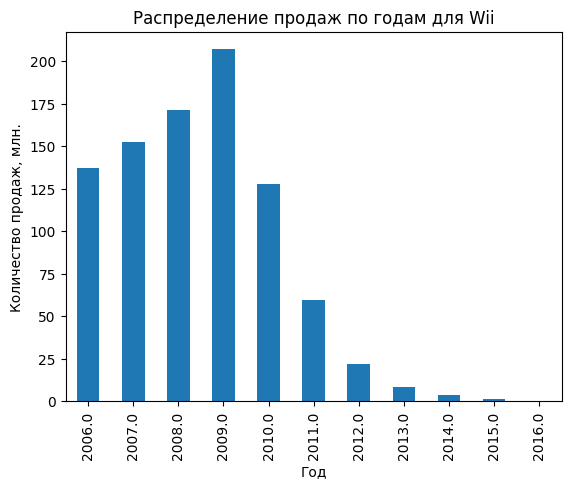

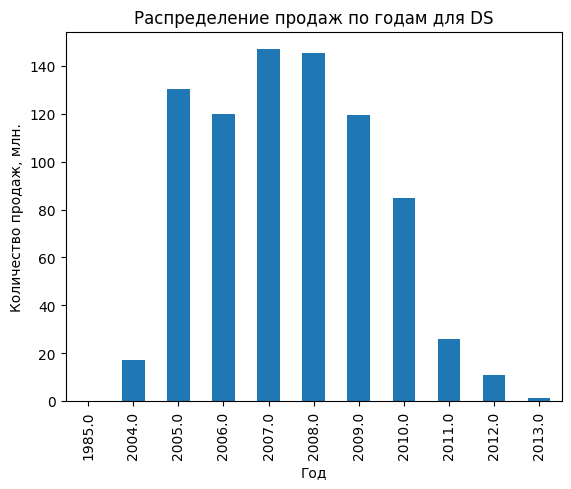

In [30]:
# графики для топ-5 платформ
for p in ['PS2', 'X360', 'PS3', 'Wii', 'DS']:
    (data.query('platform==@p')
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
        .plot(kind='bar', legend=False))
    plt.title(f'Распределение продаж по годам для {p}')
    plt.xlabel('Год')
    plt.ylabel('Количество продаж, млн.')

Все графики объединяет, что большая часть продаж происходит за 6-8 лет, можно сделать вывод что игровые платформы живут примерно столько

Есть странный выброс 1985 года у DS, посмотрим на игры выпущенные для этой платформы в 1985 году

In [31]:
# выводим строки с играми для ds 1985 года выпуска
data.query('platform == "DS" and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,RP,0.02


Всего одна игра с низкими продажами, можно удалить аномалию

In [32]:
# удаляем строку
data = data.drop(15704).reset_index(drop=True)

### Какие платформы лидируют по продажам, растут или падают

Исходя из предыдущего вывода, будем изучать данные за последние 3 года (с 2014 включительно), так можно определить какие платформы растут по продажам, а какие уже падают

Для удобства сделаем датафрейм с актуальной информацией (за последние 3 года)

In [33]:
data_actual = data.query('year_of_release >= 2014').reset_index(drop=True)

In [34]:
# создаем датафрейм с суммой общих продаж с 2014 года по каждой платформе
platform_yearly_sales = (data_actual
                         .groupby(['year_of_release', 'platform'])['total_sales']
                         .sum().unstack(fill_value=0))
platform_yearly_sales # выводим

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014.0,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


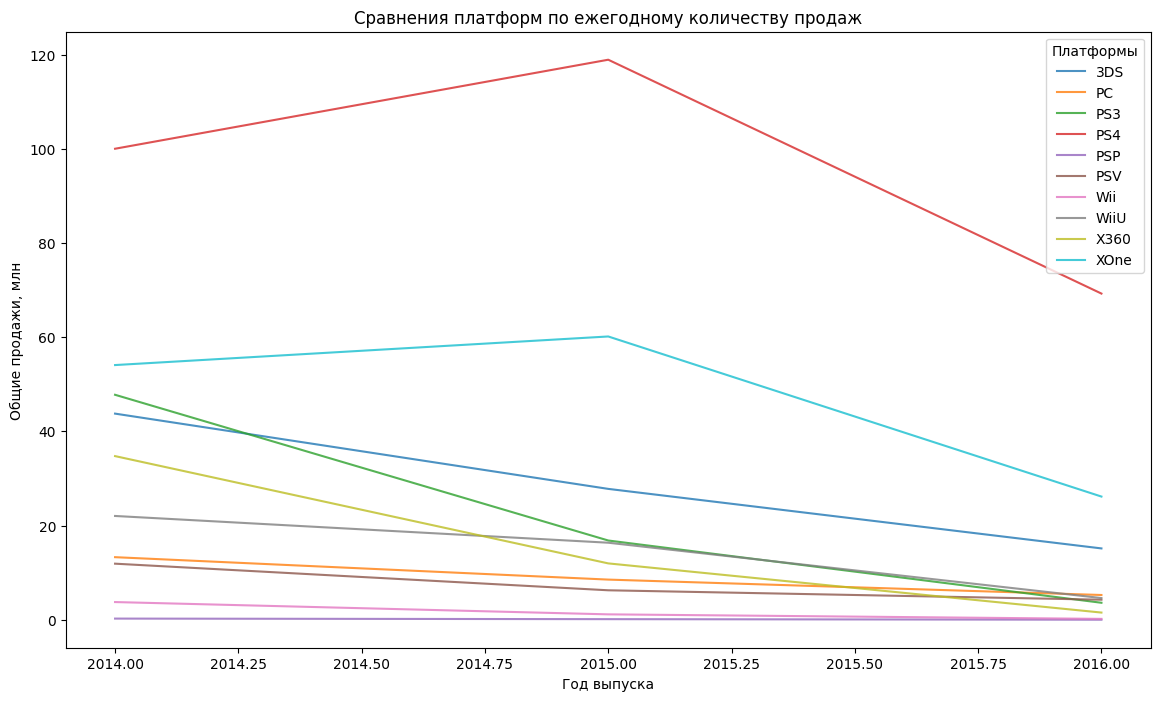

In [35]:
# строим график сравнения платформ по ежегодному количеству продаж
plt.figure(figsize=(14, 8))
for platform in platform_yearly_sales.columns:
    plt.plot(platform_yearly_sales.index, platform_yearly_sales[platform], label=platform, alpha=0.8)
    
plt.title('Сравнения платформ по ежегодному количеству продаж')
plt.xlabel('Год выпуска')
plt.ylabel('Общие продажи, млн')
plt.legend(title='Платформы');

По графику можно замететить что продажи большинства платформ падают, также данные за 2016 год неполные, что написано в описании проекта, поэтому делать вывод о падении продаж в 2016 некоректно. На графике сильно выделяется PS4 , затем идет XOne, затем идет 3DS. Построим таблицу по этим трем платформам

In [36]:
# строим таблицу по продажам PS4, XOne и 3DS
(data_actual.query('platform in ["PS4", "XOne", "3DS"]')
.groupby(['year_of_release', 'platform'])['total_sales']
.sum().unstack(fill_value=0))

platform,3DS,PS4,XOne
year_of_release,,,
2014.0,43.76,100.00,54.07
2015.0,27.78,118.90,60.14
2016.0,15.14,69.25,26.15


За период с 2014 года продажи 3DS падают, а PS4 и XOne растут, причем PS4 явно выиграла конкуренцию, судя по продажам. В 2017 году следует сделать ставку на эти 3 платформы (в большей мере на PS4 и XOne).

### Глобальные продажи игр в разбивке по платформам

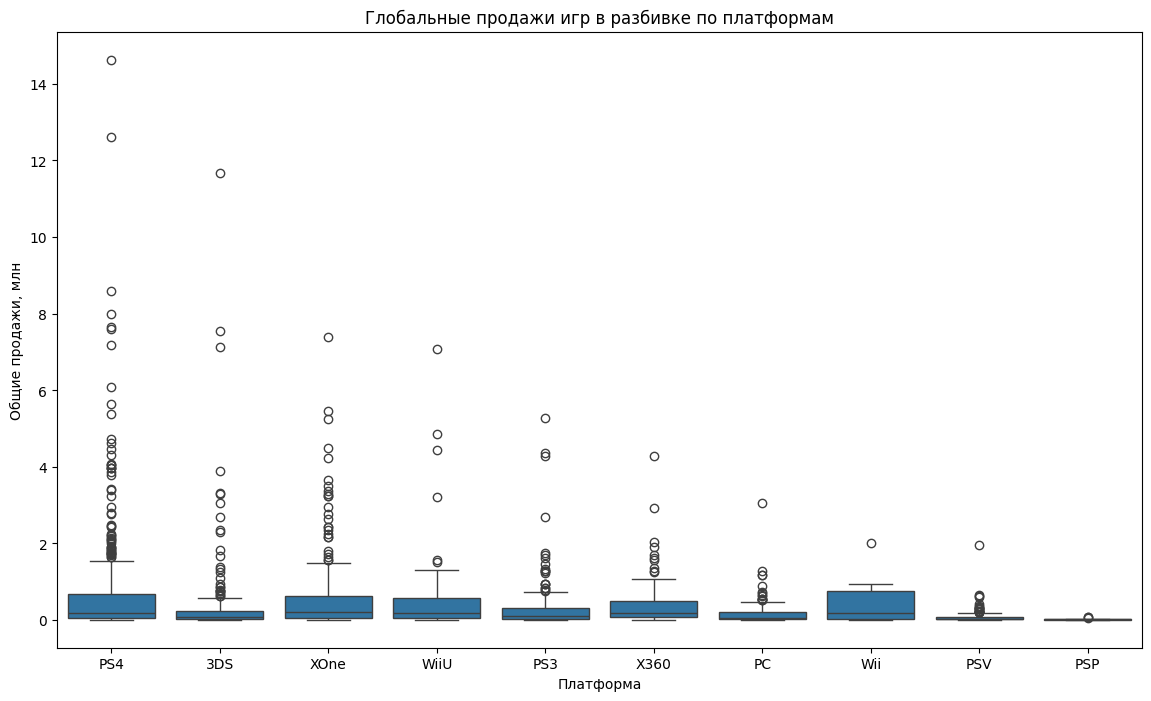

In [37]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=data_actual, x='platform', y='total_sales')
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Общие продажи, млн');

Приблизим график, чтобы видеть сам "ящик"

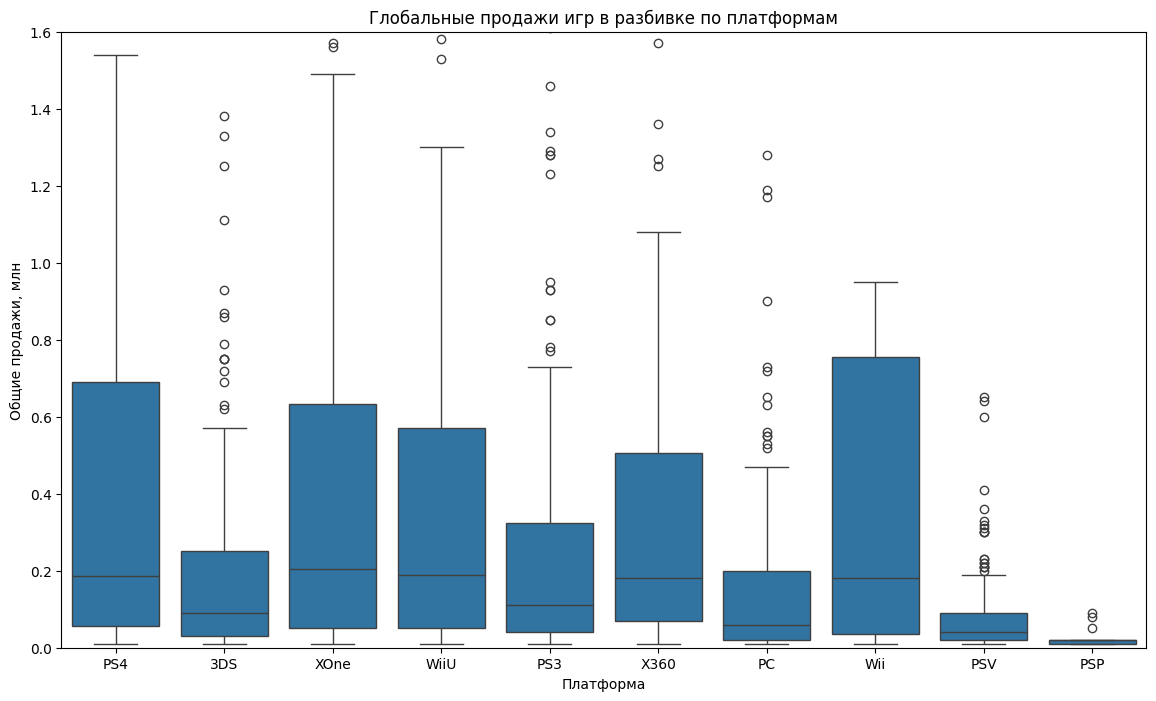

In [38]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=data_actual, x='platform', y='total_sales')
plt.ylim(0, 1.6)
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Общие продажи, млн');

У большинства платформ есть значительное количество выбросов, что говорит о наличии успешных игр с высокими продажами. Большинство игр (за исключением хитов) продаются в диапазоне от 0 до 1-2 миллионов копий, об этом свиетельствуют схожие размеры ящиков. Разница между платформами проявляется в количестве и масштабе выбросов

### Как влияют на продажи внутри одной платформы отзывы пользователей и критиков

Посмотрим, как влияют на продажи отзывы пользователей и критиков. Используем данные платформы PS4

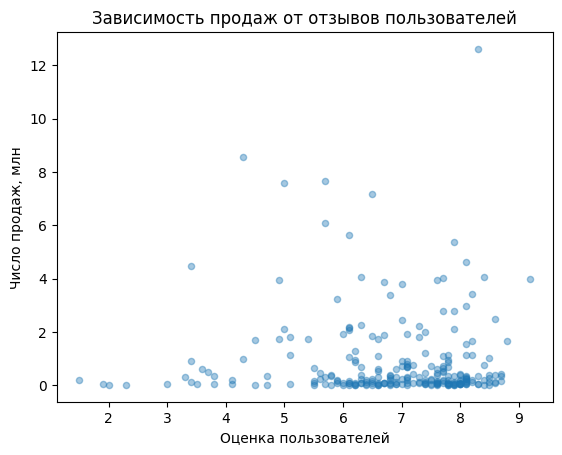

In [39]:
# строим диаграмму рассеяния
data_actual.query('platform == "PS4"').plot(kind='scatter', x='user_score', y='total_sales',alpha=0.4)
plt.title('Зависимость продаж от отзывов пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Число продаж, млн');

In [40]:
data_actual.query('platform == "PS4"')['user_score'].corr(data['total_sales']) # считаем корреляцию

np.float64(-0.048901696795305656)

График выглядит достаточно хаотично, но все же заметно, что все игры с оценкой до 3 имеют низкие продажи (до 0.5 млн), также судя по корреляции, прямой зависимости продаж от оценок пользователей нет

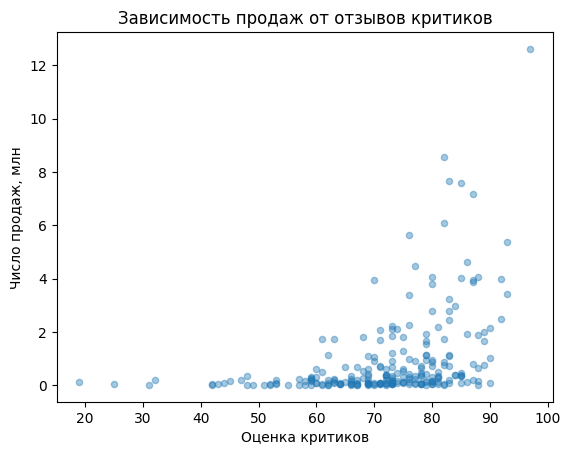

In [41]:
# строим диаграмму рассеяния
data_actual.query('platform == "PS4"').plot(kind='scatter', x='critic_score', y='total_sales',alpha=0.4)
plt.title('Зависимость продаж от отзывов критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Число продаж, млн');

In [42]:
data_actual.query('platform == "PS4"')['critic_score'].corr(data['total_sales']) # считаем корреляцию

np.float64(0.40632723012582295)

Этот график выглядит менее хаотично, а также судя по корреляции 0.4, оценки критиков оказывют умеренное положительное влияние на продажи

Сравним полученные результаты с актуальными данными по платформам конкурентам (XOne и DS)

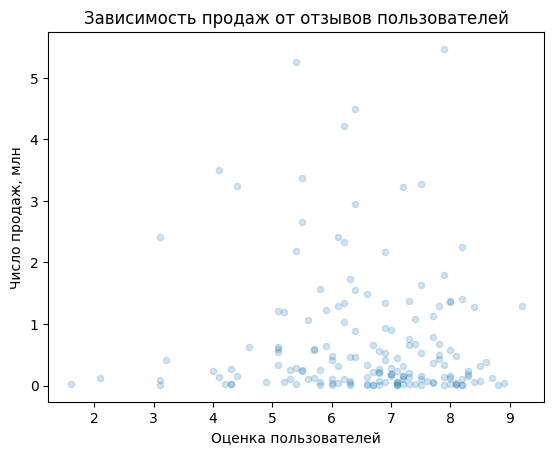

In [43]:
# строим диаграмму рассеяния
(data_actual.query('platform == "XOne" or platform == "DS"')
.plot(kind='scatter', x='user_score', y='total_sales',alpha=0.2))
plt.title('Зависимость продаж от отзывов пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Число продаж, млн');

In [44]:
data_actual.query('platform == "XOne" or platform == "DS"')['user_score'].corr(data['total_sales']) # считаем корреляцию

np.float64(-0.06216397682983682)

Тут ситуация аналогичная с PS4, следовательно отзывы пользователей практически не влияют на объем продаж, возможно, это связано с тем, что пользовательские оценки часто появляются уже после выхода игры, когда основная часть продаж уже совершена

Text(0, 0.5, 'Число продаж, млн')

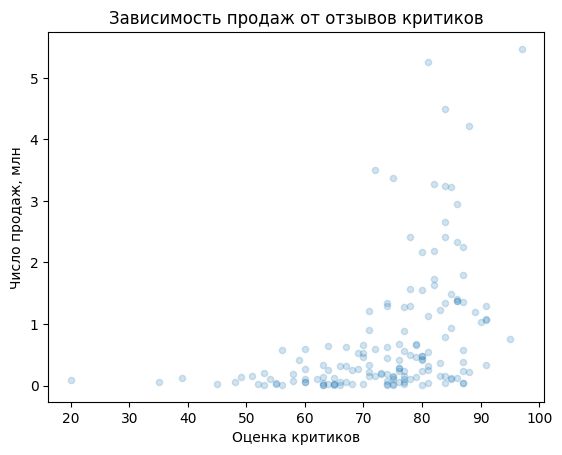

In [45]:
# строим диаграмму рассеяния
(data_actual.query('platform == "XOne" or platform == "DS"')
 .plot(kind='scatter', x='critic_score', y='total_sales',alpha=0.2))
plt.title('Зависимость продаж от отзывов критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Число продаж, млн')

In [46]:
data_actual.query('platform == "XOne" or platform == "DS"')['critic_score'].corr(data['total_sales']) # считаем корреляцию

np.float64(0.4437775404615713)

Общая корреляция выше, чем у PS4 (0.44), что может говорить о том, что аудитория PS4 менее внимательно относится к профессиональным обзорам, в итоге отзывы критиков оказывают заметное положительное влияние на продажи игр

### Общее распределение игр по жанрам

In [47]:
# создаем таблицу с общим количеством игр и продаж по жанрам
genre_sales = (data_actual
               .groupby('genre')
               .agg(total_games=('genre', 'count'), total_sales=('total_sales', 'sum'))
               .sort_values('total_games', ascending=False))
genre_sales # выводим

,total_games,total_sales
genre,,
Action,619,199.36
Role-Playing,221,101.44
Adventure,185,17.55
Sports,161,109.48
Shooter,128,170.94
Misc,113,37.55
Racing,69,27.52
Fighting,60,28.22
Simulation,44,13.13


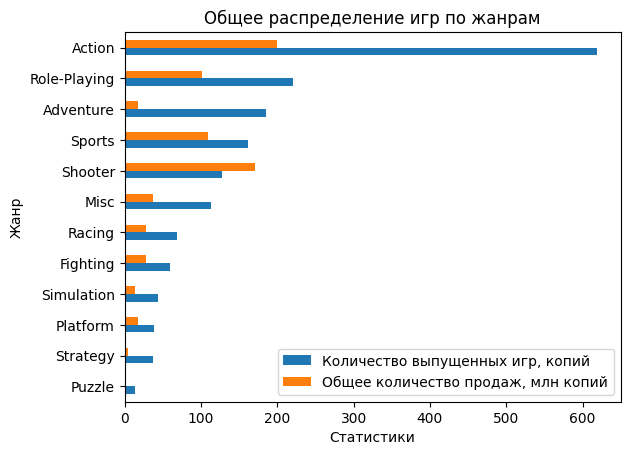

In [48]:
genre_sales.sort_values('total_games').plot(kind='barh')
plt.title('Общее распределение игр по жанрам')
plt.xlabel('Статистики')
plt.ylabel('Жанр')
plt.legend(('Количество выпущенных игр, копий', 'Общее количество продаж, млн копий'));

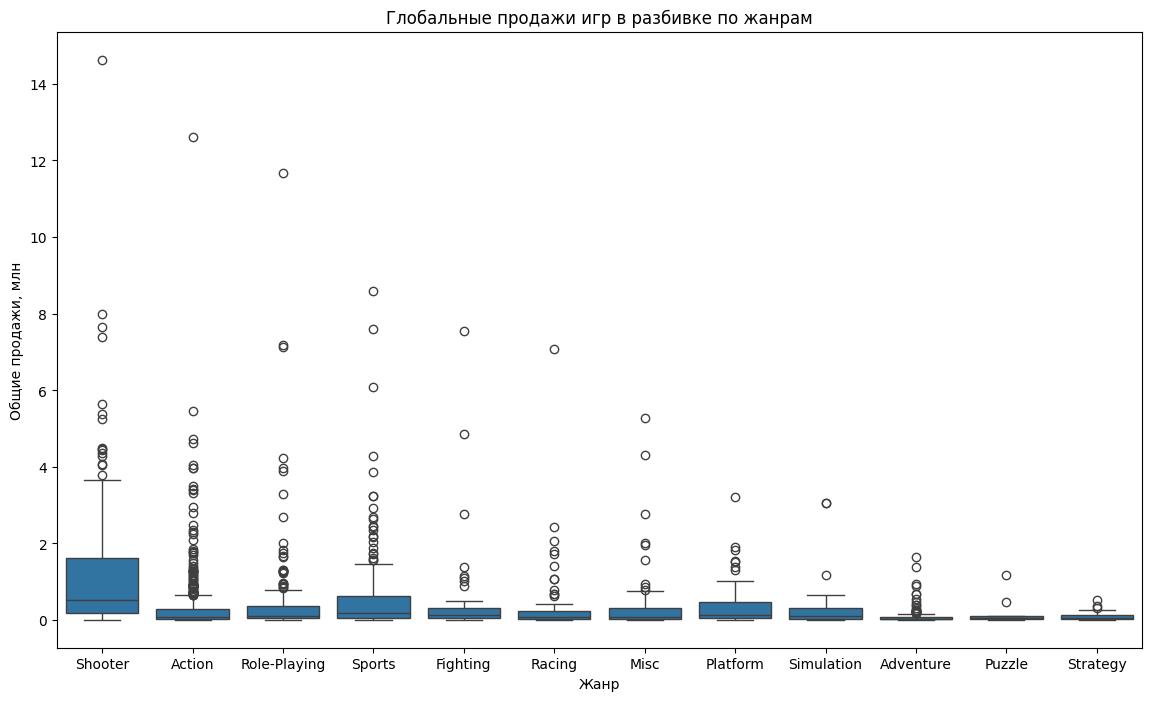

In [49]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=data_actual, x='genre', y='total_sales')
plt.title('Глобальные продажи игр в разбивке по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Общие продажи, млн');

Приблизим график

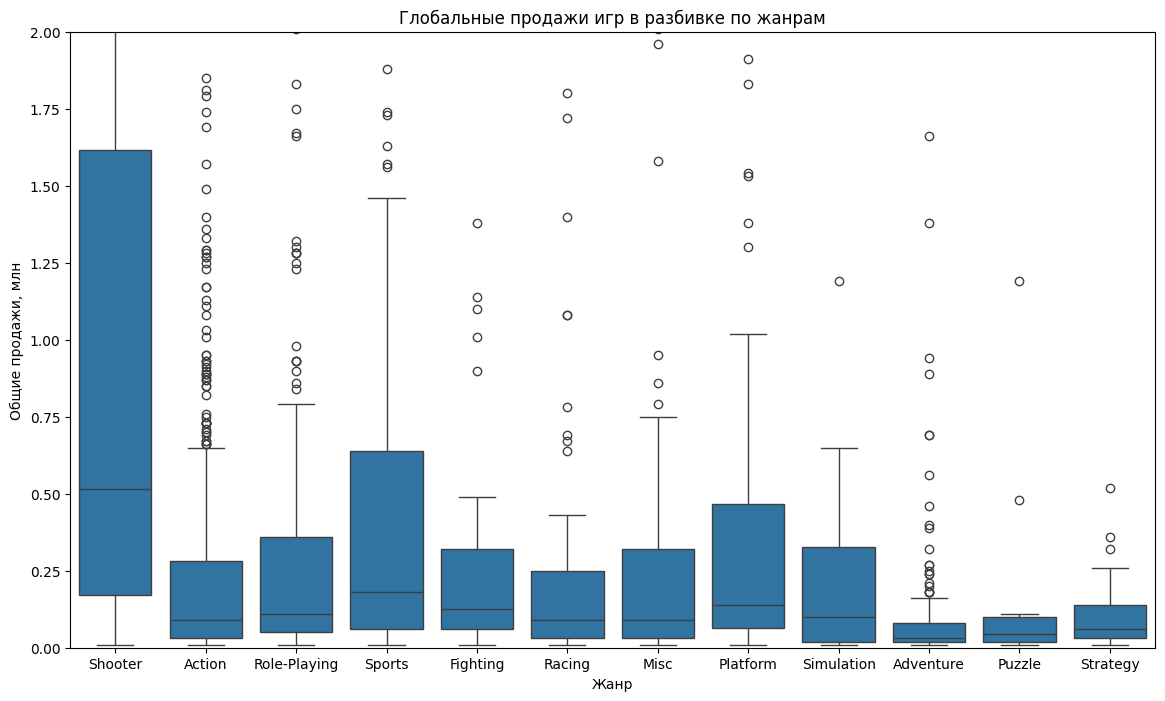

In [50]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=data_actual, x='genre', y='total_sales')
plt.ylim(0, 2)
plt.title('Глобальные продажи игр в разбивке по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Общие продажи, млн');

Самые прибыльные жанры — это Action, Shooter и Role-Playing (они демонстрируют самые высокие продажи). У Action самый высокий объем выпускаемых игр, а у Shooter — сильно меньше игр, но высокая прибыль, что говорит о большом успехе отдельных хитов. 

У Simulator, Strategy и Puzzle самые низкие продажи, а у Adventure, несмотря на значительное количество выпущенных игр, низкие продажи, что указывает на меньшую коммерческую успешность этого жанра.

**Общий вывод:** В результате исследовательского анализа данных были выявлены ключевые тренды игровой индустрии. Определено, что пик выпуска игр пришелся на 2008–2011 годы, после чего наблюдалось снижение, и для актуального прогноза использован период с 2014 года. Выделены перспективные платформы — PS4 , XOne и 3DS , где PS4 лидирует по продажам. Отзывы критиков оказывают умеренное положительное влияние на продажи, в отличие от отзывов пользователей. Наиболее прибыльные жанры — Action , Shooter и Role-Playing , тогда как Simulator, Strategy, Puzzle и Adventure показывают низкие результаты. 

## Портрет пользователя каждого региона

### Обзор рынка платформ

Для того чтобы составить портреты пользователей разных регионов сравним популярность платформ в NA, EU и JP

In [51]:
# цветовая карта для диаграмм
color_map = {
    'PS4': '#A3AFFF',
    'XOne': '#A3FFB9',
    '3DS': '#8DAA93',
    'WiiU': '#FFA2A9',
    'X360': '#FFEAA3',
    'PC': '#BFAAAC',
    'PS3': '#AAA38D',
    'PSV': '#805458',
    'Other': '#8D90AA'
}

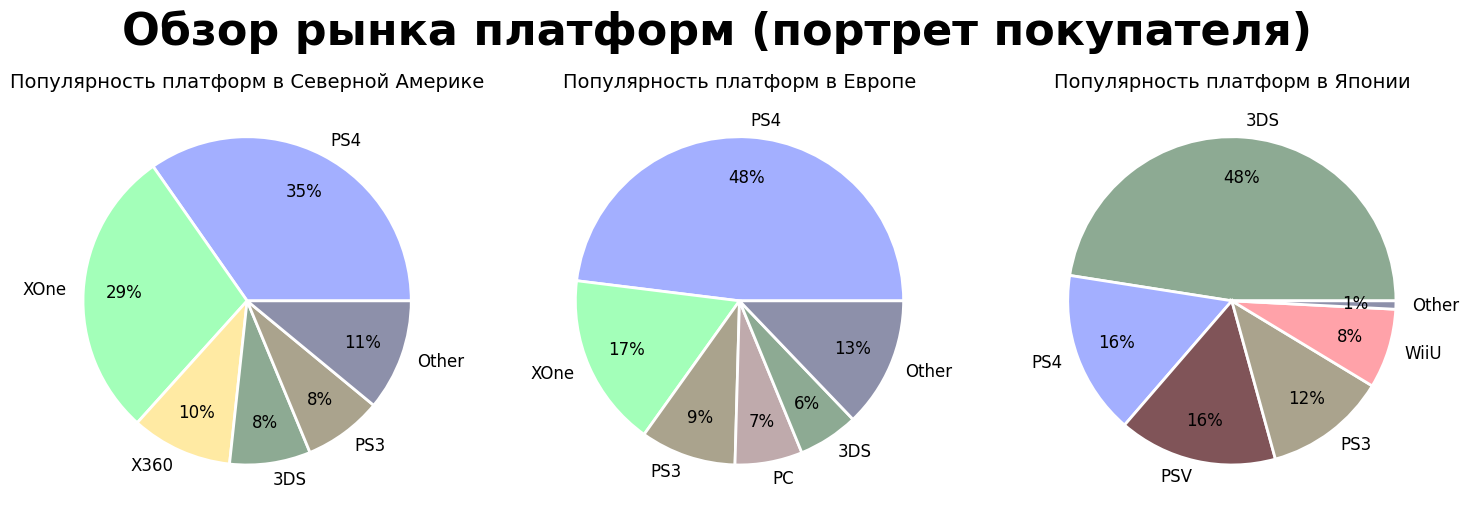

In [52]:
# создем фигуру и ячейки для графиков 
f, axes = plt.subplots(1, 3, figsize=(18, 6))

# списки для работы в цикле
regions = ['na_sales', 'eu_sales', 'jp_sales']
names = ['Северной Америке', 'Европе', 'Японии']

# общий заголовок
f.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize=32, fontweight='bold')

# заполняем ячейки с помощью цикла
for i in range(3):
    # выбираем i-ую ячейку
    ax = axes[i]
    
    # создаем топ-5 платформ в регионе
    platform = data_actual.groupby('platform')[regions[i]].sum().sort_values(ascending=False)
    old_sum = sum(platform)
    platform = platform.head()
    platform['Other'] = old_sum - sum(platform)
    
    # рисуем круговую диаграмму
    platform.plot.pie(pctdistance=0.75, 
                      ax=ax, 
                      autopct='%1.0f%%', 
                      textprops={'fontsize': 12},
                      colors=[color_map[i] for i in platform.index], 
                      wedgeprops={'lw':2,'edgecolor':'w'})
    ax.set_ylabel('')
    ax.set_title(f'Популярность платформ в {names[i]}', fontsize=14)

В Северной Америке доминируют современные консоли нового поколения (PS4 и XOne), которые вместе занимают более 64% рынка. В Европе PS4 занимает почти половину рынка (48%), на втором месте XOne с 17%. В Японии большая часть рынка принадлежит портативным устройствам, таким как 3DS, PSV и WiiU, вместе они занимают более 72% рынка, а среди домашних консолей популярны PS4 и PS3

### Обзор рынка жанров

Теперь сравним популярность жанров в NA, EU и JP

In [53]:
# цветовая карта для диаграмм
color_map = {
    'Action': '#A3AFFF',
    'Shooter': '#A3FFB9',
    'Sports': '#8DAA93',
    'Role-Playing': '#FFA2A9',
    'Misc': '#FFEAA3',
    'Racing': '#BFAAAC',
    'Fighting': '#AAA38D',
    'Other': '#8D90AA'
}

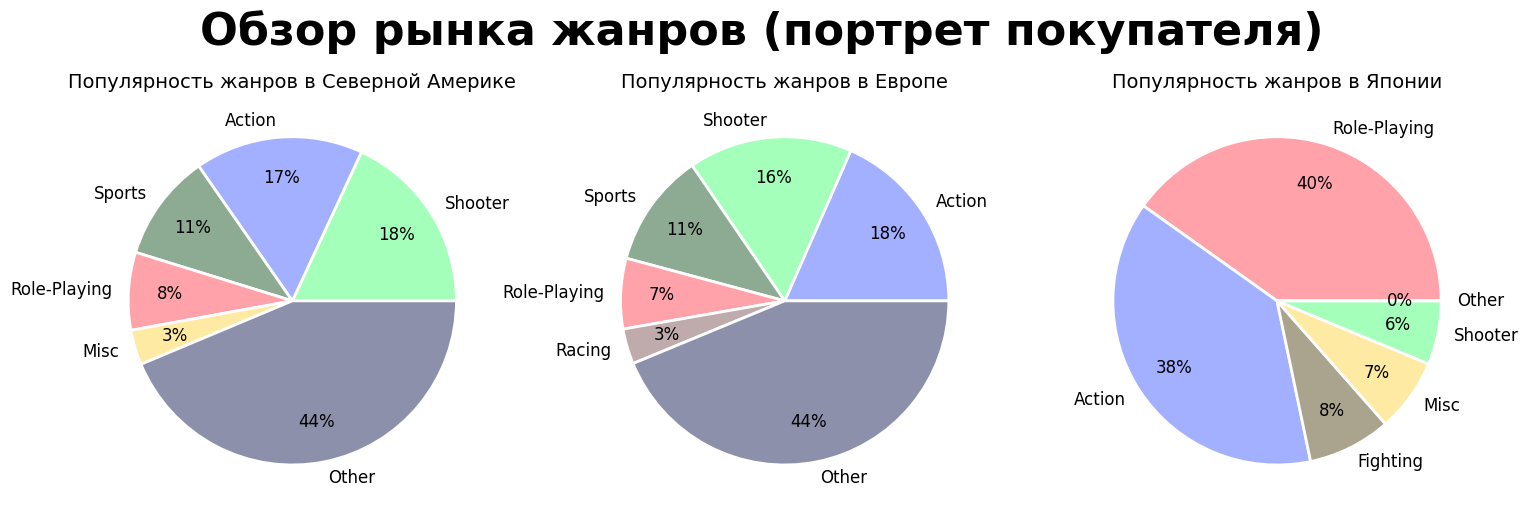

In [54]:
# создем фигуру и ячейки для графиков 
f, axes = plt.subplots(1, 3, figsize=(18, 6))

# списки для работы в цикле
regions = ['na_sales', 'eu_sales', 'jp_sales']
names = ['Северной Америке', 'Европе', 'Японии']

# общий заголовок
f.suptitle('Обзор рынка жанров (портрет покупателя)', fontsize=32, fontweight='bold')

# заполняем ячейки с помощью цикла
for i in range(3):
    # выбираем i-ую ячейку
    ax = axes[i]
    
    # создаем топ-5 жанров в регионе
    genre = data_actual.groupby('genre')[regions[i]].sum().sort_values(ascending=False)
    old_sum = sum(genre)
    genre = genre.head(5)
    genre['Other'] = old_sum - sum(platform)
    
    # рисуем круговую диаграмму
    genre.plot.pie(pctdistance=0.75, 
                      ax=ax, 
                      autopct='%1.0f%%', 
                      textprops={'fontsize': 12},
                      colors=[color_map[i] for i in genre.index], 
                      wedgeprops={'lw':2,'edgecolor':'w'})
    ax.set_ylabel('')
    ax.set_title(f'Популярность жанров в {names[i]}', fontsize=14)

В Северной Америке доминируют жанры Action и Shooter. В Европе схожая ситуация с Северной Америкой, где Action и Shooter являются наиболее популярными жанрами, но вместо Misc в Европе на 5 месте игры жанра Racing. А Японская аудитория предпочитает Role-Playing и Action. Также можно заметить что доля игр других жанров в Северной Америке и Европе 44%, а в Японии близка к 0%, это свидетельствует о том, что предпочтения игроков в Северной Америке и Европе более разнообразны, а в Японии спрос концентрирован на нескольких ключевых жанрах

### Влияние рейтинга ESRB на продажи

Посмотрим как влияет рейтинг ESRB на продажи в этих регионах

In [55]:
# цветовая карта для диаграмм
color_map = {
    'M': '#A3AFFF',
    'E': '#A3FFB9',
    'E10+': '#FFA2A9',
    'T': '#FFEAA3',
    'RP': '#8D90AA'
}

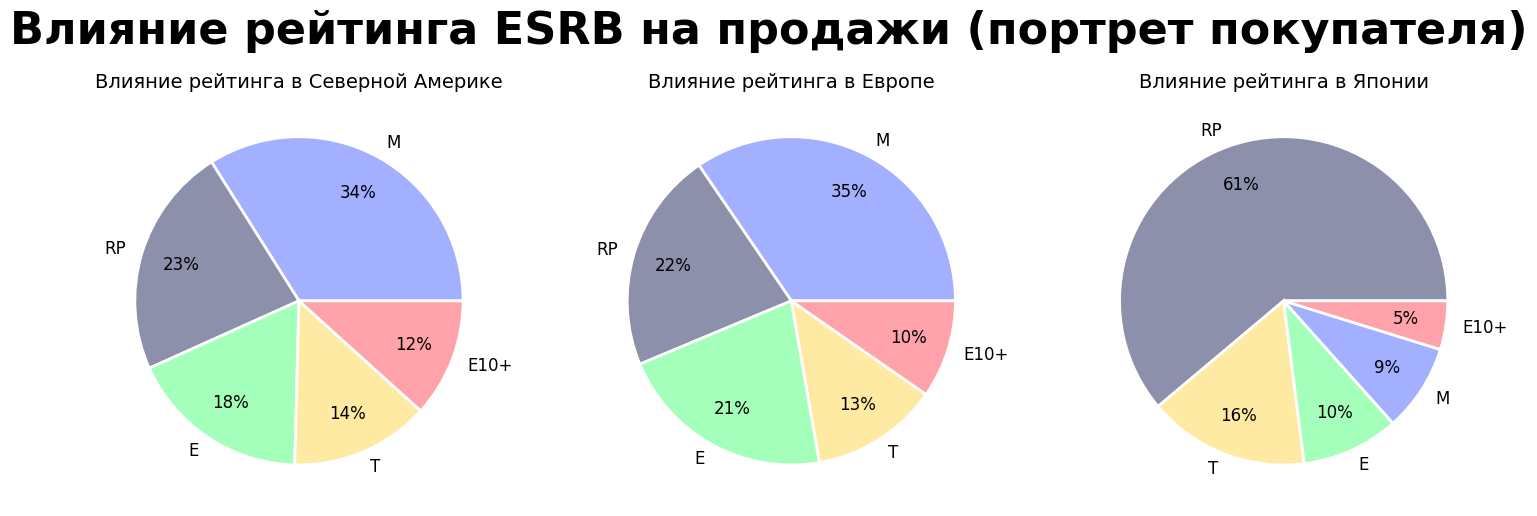

In [56]:
# создем фигуру и ячейки для графиков 
f, axes = plt.subplots(1, 3, figsize=(18, 6))

# списки для работы в цикле
regions = ['na_sales', 'eu_sales', 'jp_sales']
names = ['Северной Америке', 'Европе', 'Японии']

# общий заголовок
f.suptitle('Влияние рейтинга ESRB на продажи (портрет покупателя)', fontsize=32, fontweight='bold')

# заполняем ячейки с помощью цикла
for i in range(3):
    # выбираем i-ую ячейку
    ax = axes[i]
    
    # создаем топ-5 жанров в регионе
    rating = data_actual.groupby('rating')[regions[i]].sum().sort_values(ascending=False)
    
    # рисуем круговую диаграмму
    rating.plot.pie(pctdistance=0.75, 
                      ax=ax, 
                      autopct='%1.0f%%', 
                      textprops={'fontsize': 12},
                      colors=[color_map[i] for i in rating.index], 
                      wedgeprops={'lw':2,'edgecolor':'w'})
    ax.set_ylabel('')
    ax.set_title(f'Влияние рейтинга в {names[i]}', fontsize=14)

В Северной Америке и Европе преобладает рейтинг M (34 и 35 % соответственно), что отражает высокий спрос со стороны взрослой аудитории. Далее идут игры с рейтингом RP (23 и 22 % соответственно), возможно потому что некоторые игры не имеют окончательного рейтинга при релизе. Японская аудитория предпочитает игры с рейтингом RP (61%), возможно это связано с тем, что японские издатели используют собственную систему классификации (CERO) вместо ESRB. Далее идут игры с рейтингами T и E (16 и 10 % соответственно), что подчеркивает спрос среди семейной и подростковой аудитории

**Промежуточный вывод:** В результате анализа портретов пользователей каждого региона (NA, EU, JP) были выявлены ключевые различия в предпочтениях аудитории, что помогло составить портреты пользователей из разных регионов.
- *Северная Америка:* пользователи предпочитают современные домашние консоли (PS4 и XOne), которые занимают значительную долю рынка, при этом портативные консоли менее популярны. Наиболее востребованными жанрами являются Shooter, Action и Sports. Основная аудитория — взрослые игроки, что подтверждается популярностью игр с рейтингом M. 
- *Европа:* картина схожа с Северной Америкой: доминируют PS4 и XOne, а портативные консоли менее популярны. Жанровые предпочтения также включают Action, Shooter и Sports. А аудитория также ориентирована на игры для взрослых.
- *Япония:* пользователи предпочитают портативные консоли, особенно 3DS, что отличает их от западных регионов. Жанровые предпочтения: Role-Playing и Action. Большинство игр не имеют рейтинга ESRB, так как используется собственная система CERO, а среди имеющихся преобладают рейтинги T и E, что говорит о том, что основная аудитория — подростки.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза H₀: средние пользовательские рейтинги XOne = средним пользовательским рейтингам PC. Альтернативная гипотеза (двусторонняя) H₁: средние пользовательские рейтинги XOne не равны средним пользовательским рейтингам PC. Мы используем двустороннюю альтернативу, так как нас интересует любое статистически значимое различие

Чтобы проверить гипотезу, проведем двухвыборочный т-тест для независимых переменных

In [57]:
alpha = 0.05 # задаем уровень статистической значимости

In [58]:
# проводим тест для независимых выборок
results1 = st.ttest_ind(data_actual.query('platform == "XOne" and user_score.isna() == False')['user_score'],
            data_actual.query('platform == "PC" and user_score.isna() == False')['user_score'])

In [59]:
results1.pvalue # выводим pvalue

np.float64(0.10450507919348416)

In [60]:
# отвергаем или не отвергаем нулевую гипотезу
if results1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, cредние пользовательские рейтинги платформ Xbox One и PC разные')
else:
    print('Нулевую гипотезу отвергнуть не удалось, cредние пользовательские рейтинги платформ Xbox One и PC одинаковые')

Нулевую гипотезу отвергнуть не удалось, cредние пользовательские рейтинги платформ Xbox One и PC одинаковые


### Средние пользовательские рейтинги жанров Action и Sports разные

Нулевая гипотеза H₀: средние пользовательские рейтинги жанра Action = средним пользовательским рейтингам Sports. Альтернативная гипотеза (двусторонняя) H₁: средние пользовательские рейтинги жанра Action не равны средним пользовательским рейтингам Sports. Мы используем двустороннюю альтернативу, так как нас интересует любое статистически значимое различие

Чтобы проверить гипотезу, проведем двухвыборочный т-тест для независимых переменных

In [62]:
# проводим тест для независимых выборок
results2 = st.ttest_ind(data_actual.query('genre == "Action" and user_score.isna() == False')['user_score'],
                        data_actual.query('genre == "Sports" and user_score.isna() == False')['user_score'])

In [63]:
results2.pvalue # выводим pvalue

np.float64(2.871114798510586e-19)

In [64]:
# отвергаем или не отвергаем нулевую гипотезу
if results2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, cредние пользовательские рейтинги жанров Action и Sports разные')
else:
    print('Нулевую гипотезу отвергнуть не удалось, Средние пользовательские рейтинги жанров Action и Sports одинаковые')

Отвергаем нулевую гипотезу, cредние пользовательские рейтинги жанров Action и Sports разные


**Промежуточный вывод:** В результате проверки гипотез были проведены 2 t-теста и получены следующие результаты: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые, cредние пользовательские рейтинги жанров Action и Sports разные. Эти выводы помогут учитывать особенности платформ и жанров при планировании рекламных кампаний и разработке стратегий продвижения игр

# Общий вывод

Исследование данных об игровой индустрии позволило выявить ключевые закономерности, влияющие на успешность компьютерных игр, и определить основные тренды для планирования рекламных кампаний в интернет-магазине "Стримчик". В ходе анализа были обработаны данные, устранены пропуски, дубликаты и аномалии, а также проведен исследовательский и статистический анализ.

**Основные выводы:**
 - *Жизненный цикл платформ:*
   - Средняя продолжительность жизни игровых платформ составляет 6–8 лет. Исходя из этого, для анализа были выбраны данные за последние 3 года (с 2014 года).
   - Наиболее перспективными платформами оказались PS4, XOne и 3DS, где PS4 лидирует по продажам. Платформы PS4 и XOne демонстрируют рост, тогда как популярность 3DS постепенно падает.
 - *Влияние отзывов на продажи:*
   - Отзывы критиков оказывают умеренное положительное влияние на продажи.
   - Отзывы пользователей практически не влияют на объем продаж (корреляция близка к нулю), что может быть связано с их появлением после основной волны продаж.
 - *Популярные жанры:*
   - Самые прибыльные жанры — Action, Shooter и Sports. Жанр Action лидирует по количеству выпущенных игр, а Shooter отличается высокой прибыльностью благодаря хитовым франшизам.
   - Жанры Adventure, Simulator, Strategy и Puzzle показывают самые низкие продажи, что указывает на их меньшую коммерческую успешность.
 - *Портреты пользователей в регионах:*
   - NA: пользователи предпочитают PS4 и XOne, жанры Action, Shooter и Sports, игры с рейтингом M
   - EU: аналогично NA
   - JP: доминируют портативные консоли (особенно 3DS), жанры Role-Playing и Action, а большинство игр не имеет рейтинга ESRB.
 - *Проверка гипотез:*
   - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
   - Средние пользовательские рейтинги жанров Action и Sports разные
   
Проведенный анализ позволяет лучше понять поведение пользователей и их предпочтения в зависимости от региона, платформы и жанра. Полученные результаты помогут магазину "Стримчик" сделать ставку на перспективные продукты, спланировать рекламные кампании и повысить эффективность бизнеса в 2017 году.